## Camera Footprint Calulator
In this Jupyter notebook, we can compute and plot the footprint of a camera or other field of view (FOV) related sensor. You will need to edit the Inputs cell below to compute metrics.


In [1]:
# Modules
import math
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.art3d as art3d
%matplotlib notebook
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#INPUTS
cam_name = "ACTI A31"
units= "feet"
horz_fov_deg = 106.9
vert_fov_deg = 79.9
inst_height = 4
pitch_deg = 20.0
roll_deg = 15.0

In [2]:
def footprint(horzFOV, vertFOV, pitch, roll, camera_pos, air_gap):
    """Compute a footprint given FOV, pitch, and roll
    
    Parameters
        horzFOV : flt
            Horizontal field of view of the sensor in degrees
        vertFOV : flt
            Vertical field of view of the sensor in degrees
        pitch : flt
            Pitch of sensor in degrees (rotation about x-axis)
        roll : flt
            Roll of sensor in degrees (rotation about y-axis)
        [TODO: Add] yaw : flt
            Yaw of sensor in degrees (rotation about z-axis)
        camera_pos : flt
            Tulple X,Y,Z coordinate of camera. Units arbitrary
        air_gap : flt
            Distance from camera position to plane of the footprint. 
            This could be the AGL elevation, or the diference between
            water stage and the camera for example.
    
    Returns
        origin
            A tuple with the X,Y,Z coordinate of the principle point of the 
            footprint
        footprint_pos
            A standard position tuple relative to upper left of the footprint
            in the form: (x, y, width, height).
    """
    cX = float(camera_pos[0])
    cY = float(camera_pos[1])
    cZ = float(camera_pos[2])
    eta = float(air_gap)
    p = np.radians(float(pitch))
    r = np.radians(float(roll))
    h = np.radians(float(horzFOV))
    v = np.radians(float(vertFOV))
    top = cZ * np.tan(p + 1/2 * v)
    bottom = cZ * np.tan(p - 1/2 * v)
    left = cZ * np.tan(r + 1/2 * h)
    right = cZ * np.tan(r - 1/2 * h)
    print(top,bottom,left,right)
    height = top - bottom
    width = left - right
    origin = ((np.tan(r) * cZ)+cX, (np.tan(p) * cZ)+cY, cZ - eta)
    footprint_pos = ((origin[0] - (width/2)), (origin[1] - (height/2)), width, height)
    return origin, footprint_pos

# Compute footprint with no pitch and roll
camera_pos = (10., 5., inst_height)
air_gap = inst_height
o1, fp1 = footprint(horz_fov_deg,vert_fov_deg,0,0,camera_pos,air_gap)

# Compute footprint accounting for pitch and roll
o2, fp2 = footprint(horz_fov_deg,vert_fov_deg,pitch_deg,roll_deg,camera_pos,air_gap)

print(fp1, o1)
print(fp2, o2)

3.3504544858023726 -3.3504544858023726 5.395835573841696 -5.395835573841696
6.914261665388458 -1.451929110100969 10.128661999130216 -3.1760483566082676
(4.604164426158304, 1.6495455141976274, 10.791671147683392, 6.700908971604745) (10.0, 5.0, 0.0)
(4.419441591855249, 2.272785549320096, 13.304710355738484, 8.366190775489427) (11.071796769724491, 6.455880937064809, 0.0)


## Plots

<IPython.core.display.Javascript object>


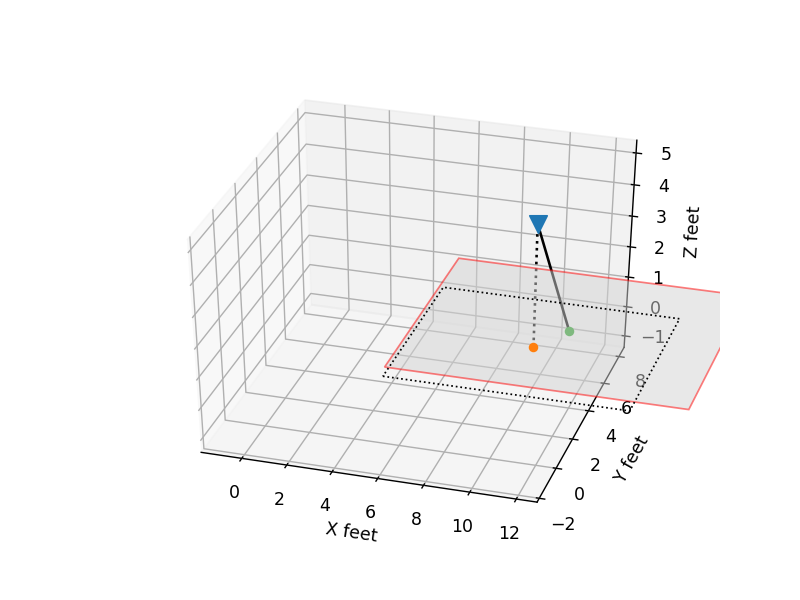

In [3]:

#def plot_footprint(ax, origin, footprint, **plotkwargs):
    
ax = plt.axes(projection='3d')

rect_o = patches.Rectangle((fp1[0],fp1[1]),fp1[2],fp1[3],linewidth=1,edgecolor='black',facecolor='none',alpha=1, linestyle=":")
rect_fp = patches.Rectangle((fp2[0],fp2[1]),fp2[2],fp2[3],linewidth=1,edgecolor='r',facecolor='lightgrey',alpha=0.5)
ax.add_patch(rect_o)
ax.add_patch(rect_fp)
art3d.pathpatch_2d_to_3d(rect_o, z=o1[2], zdir="z")
art3d.pathpatch_2d_to_3d(rect_fp, z=o2[2], zdir="z")


ax.scatter(camera_pos[0],camera_pos[1],camera_pos[2], marker="v", s=100)
ax.scatter(o1[0],o1[1],o1[2])
ax.scatter(o2[0],o2[1],o2[2])
ax.plot3D((o1[0],camera_pos[0]),(o1[1],camera_pos[1]),(o1[2],camera_pos[2]), 'black', linestyle=":")
ax.plot3D((o2[0],camera_pos[0]),(o2[1],camera_pos[1]),(o2[2],camera_pos[2]), 'black')

ax.set_xlabel('X '+ units)
ax.set_ylabel('Y '+ units)
ax.set_zlabel('Z '+ units)
ax.set_aspect('equal', 'datalim')
plt.show()


In [4]:
print('Camera: x:{:.2f} y:{:.2f} z:{:.2f}'.format(camera_pos[0],camera_pos[1],camera_pos[2]))
print('Origin: x:{:.2f} y:{:.2f} z:{:.2f}'.format(o2[0],o2[1],o2[2]))
print('Pitch:      {:.2f} degrees'.format(pitch_deg))
print('Roll:       {:.2f} degrees'.format(roll_deg))
print('Width:      {:.2f} {}'.format(fp2[2],units))
print('Height:     {:.2f} {}'.format(fp2[3],units))
print('Prinicple point is')
print('            {:.2f} {} in front of camera, and'.format(o2[0],units))
print('            {:.2f} {} to the right of camera'.format(o2[1],units))

Camera: x:10.00 y:5.00 z:4.00
Origin: x:11.07 y:6.46 z:0.00
Pitch:      20.00 degrees
Roll:       15.00 degrees
Width:      13.30 feet
Height:     8.37 feet
Prinicple point is
            11.07 feet in front of camera, and
            6.46 feet to the right of camera
